In [ ]:
!pip -q install terra_ai
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


## Задание № 1. Подбор кандидата на должность менеджера по продажам.  

Создайте нейросеть, которая будет определять подходит ли кандидат на должность в Университете искусственного интеллекта.  

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [ ]:
# Скачиваем базу вакансий
терра_ии.загрузить_базу(база = 'ВАКАНСИИ',
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/HR.zip
Вы скачали базу вакансий.


In [ ]:
# Примеры из базы
терра_ии.показать_примеры(база = 'Вакансии')

Пример резюме:

Пол:                         Ж
Возраст:                     39
Город:                       Бугульма
Готовность к переезду:       готов к переезду
Готовность к командировкам:  не готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    50000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день, удаленная работа
Опыт работы (мес):           115
Обязанности на пред.работе:  Продажи обучений пожарно-техническому минимуму, экологической безопасности, гражданской обороне и чр
                             езвычайных ситуаций, охрана труда, мед. помощь и др., заключение договоров, поддержание отношений с 
                             клиентами с целью последующего сотрудничества, Консультация клиентов

Обработка базы и создание выборок.

In [ ]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки_вакансии()

### Создание сети

Создайте нейронную сеть, которая будет включать в себя полносвязные слои в формате:

```
# Пример, Полносвязный-128 означает, что мы используем Полновязный слой на 128 нейронов.
слои='Полносвязный-128\
 Полносвязный-2'
```
Попробуйте изменить количество нейронов и обучите модель.

In [ ]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-256\
 Полносвязный-2'

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация изображений'
    )

Создана модель нейронной сети!


Визуализация структуры.

Схема модели:


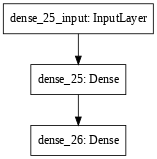

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка)

### Обучение модели.

Запуск №1   Время обучения: 7.08c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 90.15%
Запуск №2   Время обучения: 8.14c Точность на обучающей выборке: 97.8%       Точность на проверочной выборке: 89.39%
Запуск №3   Время обучения: 7.72c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 89.77%
Запуск №4   Время обучения: 11.43cТочность на обучающей выборке: 97.8%       Точность на проверочной выборке: 89.77%
Запуск №5   Время обучения: 7.04c Точность на обучающей выборке: 97.8%       Точность на проверочной выборке: 89.39%
Запуск №6   Время обучения: 7.14c Точность на обучающей выборке: 97.6%       Точность на проверочной выборке: 89.39%
Запуск №7   Время обучения: 7.13c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 90.15%
Запуск №8   Время обучения: 7.35c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 89.77%
Запуск №9   Время обучения: 7.89c Точность на обучающей выборке:

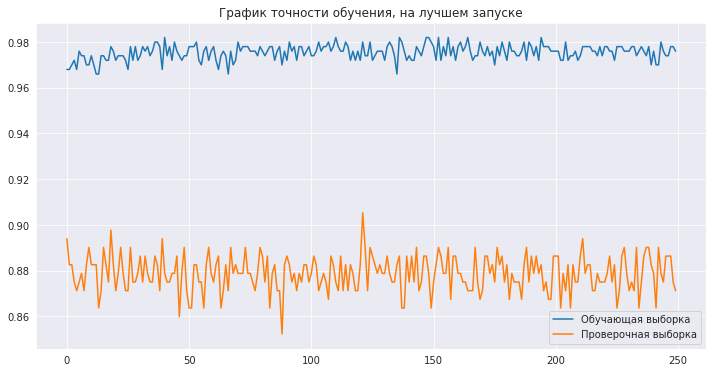

In [ ]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 250,
    количество_запусков = 10)

### Тестирование модели.

In [ ]:
терра_ии.тест_модели_вакансии(нейронка,
                              тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         Ж
Возраст:                     31
Город:                       Москва
Готовность к переезду:       готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Среднее специальное образование
Дополнительное образование:  ИП Жиганов
Зарплата:                    60000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           100
Обязанности на пред.работе:  Введение и поддержка туристических агентствВыполнение планов продажИнформирование агента о новинках 
                             компанииПолное сопровождение агента по работе во франчайзенговой сети, - консультирование агентств п
                             о продуктам компании;- консультирование агентств по отельной базе по все

## Задание № 2. Классификация отзывов автомобиля Тесла.  

Создайте нейросеть, которая будет распознавать эмоциональную окраску отзывов из базы Tesla.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [ ]:
# Загружаем базу отзывов Tesla
терра_ии.загрузить_базу(база = 'TESLA', 
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/tesla.zip
Вы скачали базу отзывов владельцев автомобилями Tesla


In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'TESLA')

В данной базе находятся положительные и негативные отзывы об автомобилях Tesla:
['Негативный отзыв', 'Позитивный отзыв']

Пример отзыва:
Тип отзыва:  Позитивный отзыв
Отзывы:
     *  Водитель наслаждается от такого авто и вождения  Красивая машина нужно брать  Тесла топ, тащусь от 


Обработка базы и создание выборок.

In [ ]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = '10000'
размер_окна = '50'
шаг = '10'
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг, 
    путь_к_базе = '/content/Отзывы/')

Формирование выборки завершено


### Создание сети.

Создайте сеть, состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный

In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-50-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-16'
ветвь2 = 'Полносвязный-64 Полносвязный-32 Полносвязный-16'
ветвь3 = 'Полносвязный-32'

нейронка = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Визуализация структуры.

Схема модели:


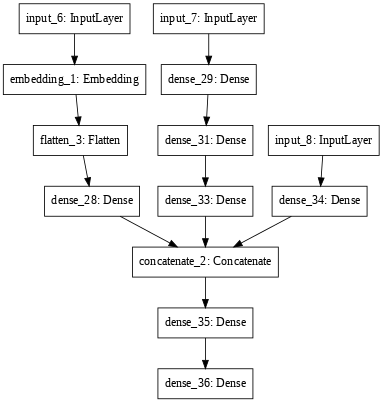

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка)

### Обучение модели.

Эпоха №1    Время обучения: 1.1c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №2    Время обучения: 1.05c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №3    Время обучения: 1.03c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №4    Время обучения: 1.02c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №5    Время обучения: 1.05c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №6    Время обучения: 1.04c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №7    Время обучения: 1.05c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №8    Время обучения: 1.03c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №9    Время обучения: 1.03c   Точность на обучающей выборк

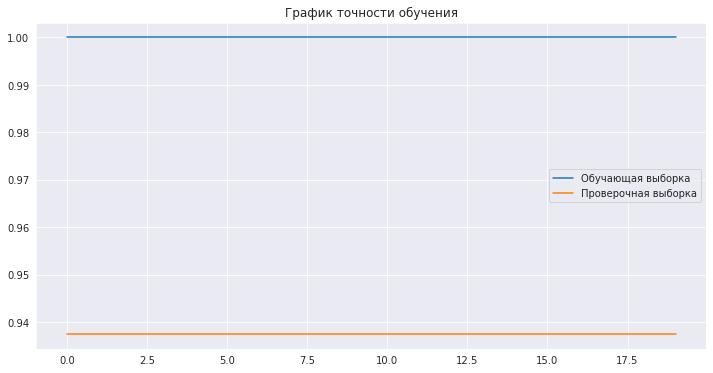

In [ ]:
эксперимент = терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 20,
  )

### Тестирование модели.

Придумайте и напишите свой отзыв.

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Автомобиль крупногабаритный, низкая маневренность на поворотах. В салоне сидеть неудобно, цена завышена.'
терра_ии.тест_модели_симптомы(нейронка, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  99.99 %
Позитивный отзыв   -  0.01 %

Нейросеть думает, что это: Негативный отзыв - 99.99%


## Задание № 3. Определение заболевания по симптомам.  

Создайте нейросеть, которая будет определять заболевание по симптомам.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.

### Работа с базой.

In [ ]:
# Загрузите базу симптомов заболеваний
терра_ии.загрузить_базу(база = 'СИМПТОМЫ ЗАБОЛЕВАНИЙ',
                        справка = 'Показать')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/symptoms.zip
Загружена база симптомов заболеваний



In [ ]:
# Покажите примеры из базы "симптомы"
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холецистит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Гепатит
Симптомы:
     * Желтуха начало гепатита напоминает грипп: повышение температуры тела головная боль общее недомогание


In [ ]:
количество_анализируемых_слов = '10000'
размер_окна = '50'
шаг = '10'

# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна, 
    шаг)

Формирование выборки завершено


### Создание сети.
Состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный



In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-100'
ветвь2 = 'Полносвязный-1024 Полносвязный-256 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Визуализация модели.

Схема модели:


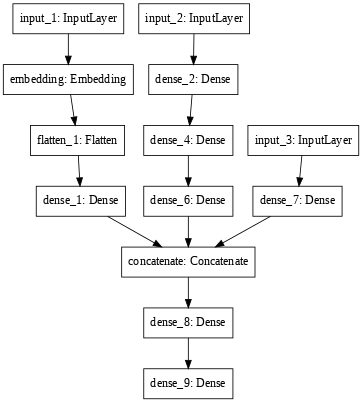

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка)

### Обучение нейронной сети.
Используя свою модель, примените функцию из terra ai:
*   терра_ии.обучение_модели()




Эпоха №1    Время обучения: 10.29c  Точность на обучающей выборке: 94.49%    Точность на проверочной выборке: 77.5%
Эпоха №2    Время обучения: 6.93c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 78.75%
Эпоха №3    Время обучения: 6.93c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.0%
Эпоха №4    Время обучения: 6.98c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.62%
Эпоха №5    Время обучения: 7.0c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 81.25%
Эпоха №6    Время обучения: 7.07c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 81.25%
Эпоха №7    Время обучения: 7.16c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.62%
Эпоха №8    Время обучения: 7.05c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.62%
Эпоха №9    Время обучения: 7.05c   Точность на обучающей выборке:

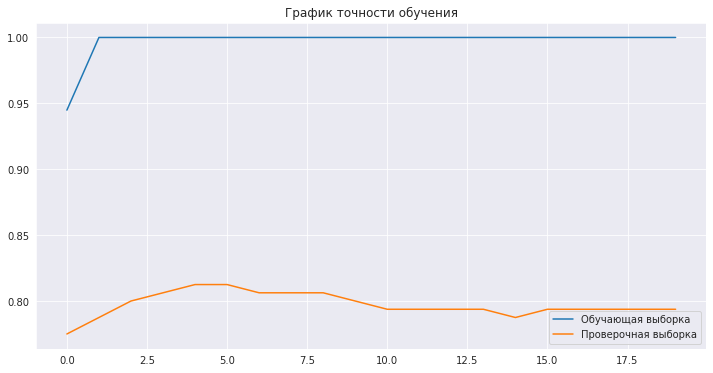

In [ ]:
эксперимент = терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 20
)

### Продемонстрируйте работу нейронной сети
Используя обученую модель для симптомов указанных в ячейке, примените функцию из terra ai:
*   терра_ии.тест_модели_симптомы()  

Можете создать другой перечень симптомов и посмотреть насколько успешно модель справляется.

In [ ]:
# Демонстрация результата работы нейронной сети
симптомы = 'боль в эпигастральной области, тошнота, рвота,  общая слабость,  болезненность при пальпации в эпига.'
терра_ии.тест_модели_симптомы(нейронка, размер_окна, шаг,
                              симптомы, классы=['Колит', 'Гепатит', 'Гастрит', 'Холицестит', 'Дуоденит', 'Энтерит', 'Язва', 'Эзофагит', 'Аппендицит', 'Панкреатит'])

Колит          -  5.11 %
Гепатит        -  2.21 %
Гастрит        -  10.97 %
Холицестит     -  20.18 %
Дуоденит       -  2.7 %
Энтерит        -  23.79 %
Язва           -  14.8 %
Эзофагит       -  3.66 %
Аппендицит     -  14.28 %
Панкреатит     -  2.32 %

Нейросеть думает, что это: Энтерит - 23.79%
